In [26]:
import pandas as pd
import pandas.plotting
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


# "Impact of Zero Replacement for Missing Values on ARIMA Model Performance: Exploring Mean Absolute Error"

In [27]:
file = r"C:\Users\Sidharth\Desktop\798Q\data.csv.csv"
df=pd.read_csv(file,index_col=0)

In [28]:
data=df.copy()

In [29]:
data=data[:-3]
data

,From,to,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
Sn,,,,,,,,,,,,
1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1


Analyzing multivariate time series data that contains NaN (missing) values replaced with zero values requires special attention to ensure accurate interpretation and meaningful analysis. Here's an overview of the theory behind analyzing such multivariate time series:

Consider the nature of missing data: Missing data can occur in multivariate time series due to various reasons such as measurement errors, sensor failures, or data collection issues. Replacing missing values with zeros assumes that the missing values indicate zero measurements rather than true zero values. It is essential to understand the context and implications of replacing missing values with zeros for accurate analysis.

Data preprocessing: Before analyzing the multivariate time series, it is crucial to preprocess the data properly. This includes handling missing values, transforming the data if necessary, and ensuring consistency in the data format. Replacing NaN values with zeros is just one approach to handle missing data, but it may not always be the most appropriate. Consider alternative methods such as interpolation or imputation techniques based on the specific characteristics of your data.

Interpretation of zero values: When missing values are replaced with zeros, it is important to interpret zero values correctly. Zero values in the time series can represent either actual zero measurements or missing values that were replaced with zeros. zero values may impact the analysis results, particularly in calculations involving averages, trends, and statistical measures.

Visual exploration: Visualizing the multivariate time series is an effective way to understand its behavior. By plotting the data, you can observe patterns, trends, and relationships between variables. However, be cautious when interpreting the zero values in the plots, as they may not reflect true zero measurements.

Analysis techniques: When analyzing multivariate time series with replaced zero values, be aware of the potential biases introduced by the replacement. The presence of zero values can affect various analysis techniques such as correlation analysis, regression modeling, or time series forecasting. Consider the implications of zero values in the specific analysis techniques used and adjust the interpretation accordingly.

Sensitivity analysis: It is important to perform sensitivity analysis to assess the impact of replacing missing values with zeros on the analysis results. This involves comparing the outcomes obtained with zero replacements to alternative approaches, such as imputation methods or excluding the affected time periods altogether. Sensitivity analysis helps evaluate the robustness of the findings and provides insights into the potential biases introduced by the zero replacements.

Overall, analyzing multivariate time series data with NaN values replaced by zero values requires careful consideration of the implications. It is recommended to explore alternative methods for handling missing data and perform sensitivity analysis to ensure the validity of the analysis results.

In [50]:
NO='NO'
data[NO].fillna(0,inplace=True)
NO2='NO2'

data[NO2].fillna(0, inplace=True)
NOX='NOX'
avg_NOX = data[NOX].mean()
data[NOX].fillna(0, inplace=True)
CO='CO'
avg_CO = data[CO].mean()
data[CO].fillna(0, inplace=True)
SO2='SO2'
avg_SO2 = data[SO2].mean()
data[SO2].fillna(0, inplace=True)
NH3='NH3'
avg_NH3 = data[NH3].mean()
data[NH3].fillna(0, inplace=True)
Ozone='Ozone'
avg_Ozone = data[Ozone].mean()
data[Ozone].fillna(0, inplace=True)
Benzene='Benzene'
avg_Benzene = data[Benzene].mean()
data[Benzene].fillna(0, inplace=True)
pm10='pm10'
avg_pm10 = data[pm10].mean()
data[pm10].fillna(0, inplace=True)
pm25='pm2.5'
avg_pm25 = data[pm25].mean()
data[pm25].fillna(0, inplace=True)

In [31]:
 data.drop(['to'], axis=1, inplace=True)

In [32]:
data.columns


Index(['From', 'pm10', 'pm2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3',
       'Ozone', 'Benzene'],
      dtype='object')

In [33]:
data['From'] = pd.to_datetime(data['From'], format = '%d-%m-%Y %H:%M')

In [34]:
data['From']

Sn
1      2023-02-01 00:00:00
2      2023-02-01 00:15:00
3      2023-02-01 00:30:00
4      2023-02-01 00:45:00
5      2023-02-01 01:00:00
               ...        
8636   2023-05-01 22:45:00
8637   2023-05-01 23:00:00
8638   2023-05-01 23:15:00
8639   2023-05-01 23:30:00
8640   2023-05-01 23:45:00
Name: From, Length: 8640, dtype: datetime64[ns]

In [35]:
data.set_index(['From'], inplace=True)

<Axes: xlabel='From'>

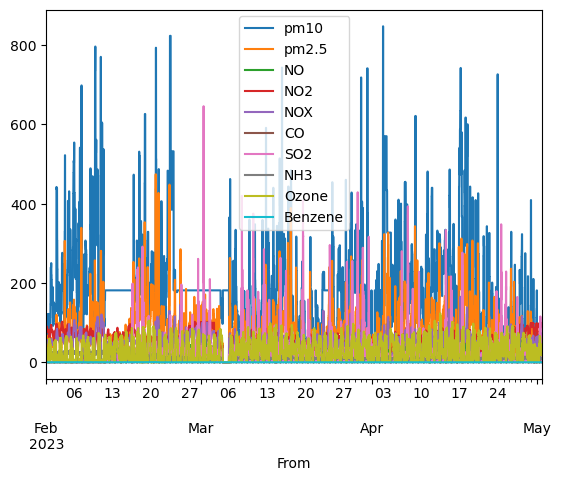

In [36]:
data.plot()

In [37]:
NO_C = data['NO']
NO2_C = data['NO2']
NOX_C = data['NOX']
CO_C = data['CO']
SO2_C = data['SO2']
NH3_C = data['NH3']
Ozone_C= data['Ozone']
Benzene_c = data['Benzene']
pm10_C = data['pm10']
pm25_C = data['pm2.5']

In [38]:
data

,pm10,pm2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
From,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,0.0,90.1,56.2,0.31,0.0,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,0.0,88.0,55.1,0.33,0.0,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,0.0,87.7,55.2,0.38,0.0,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,0.0,88.9,55.7,0.38,0.0,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,0.0,90.0,55.8,0.38,0.0,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1


In [39]:
training = data.index[7540]
msk= (data.index <= training)
data_train = data[msk].copy()
data_test = data[~msk].copy()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

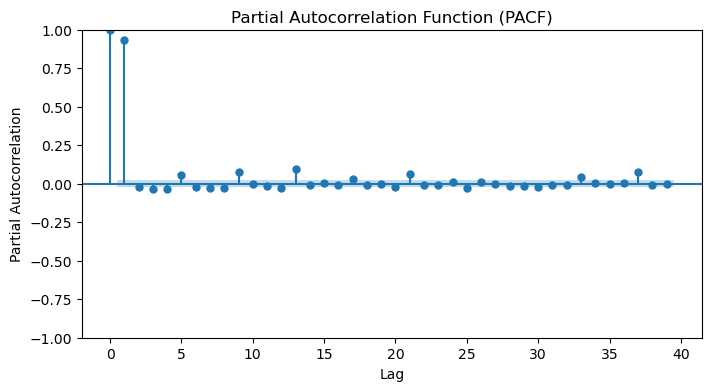

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(data_train['pm10'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Function (PACF)')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

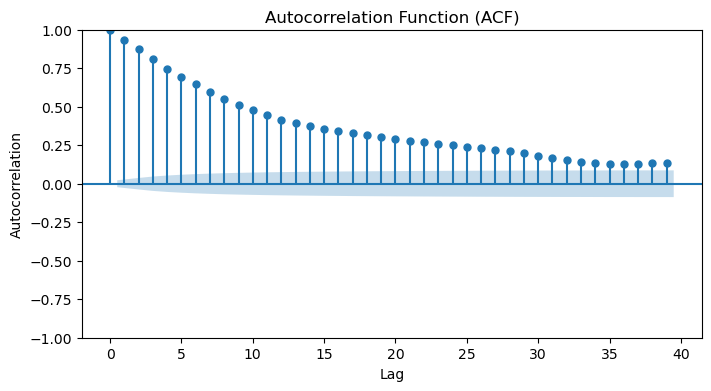

In [41]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(data_train['pm10'], ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function (ACF)')

In [42]:
plt.show()

In [43]:
pm10_CC=pm10_C[1:7540]

# Perform ADF test
result = adfuller(pm10_CC)

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistics and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -9.372954307700306
p-value: 7.293988166735943e-16


In [44]:
from pmdarima import auto_arima


In [45]:
from pmdarima.arima import auto_arima
def arimamodel(timeseriesarray) :
 autoarima_model = auto_arima(timeseriesarray, start_p=0, start_q=0, d=0, max_p=5, max_q=2)
 return autoarima_model
model = arimamodel(data_train['pm10'])
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7541
Model:               SARIMAX(5, 0, 2)   Log Likelihood              -38981.559
Date:                Sat, 15 Jul 2023   AIC                          77981.117
Time:                        00:25:38   BIC                          78043.470
Sample:                    02-01-2023   HQIC                         78002.523
                         - 04-20-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.5941      2.681      5.444      0.000       9.340      19.848
ar.L1          0.9726      0.035     27.773      0.000       0.904       1.041
ar.L2         -0.8649      0.059    -14.696      0.000      -0.980      -0.750
ar.L3          0.8189      0.050     16.271      0.000       0.720       0.918
ar.L4         -0.0557      0.044     -1.265      0.206      -0.142       0.031
ar.L5          0.0414      0.038      1.087      0.277      -0.033       0.116
ma.L1         -0.0109      0.026     -0.422      0.673      -0.062       0.040
ma.L2          0.8822      0.015     59.191      0.000       0.853       0.911
sigma2      1822.1129      8.508    214.173      0.000    1805.438    1838.788
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):           1237283.80
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             1.35
Prob(H) (two-sided):                  0.03   Kurtosis:                        65.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
auto = model.predict(n_periods = len(data_test['pm10']))
data['pm10 forecast'] = [None]*len(data_train['pm10']) + list(auto)


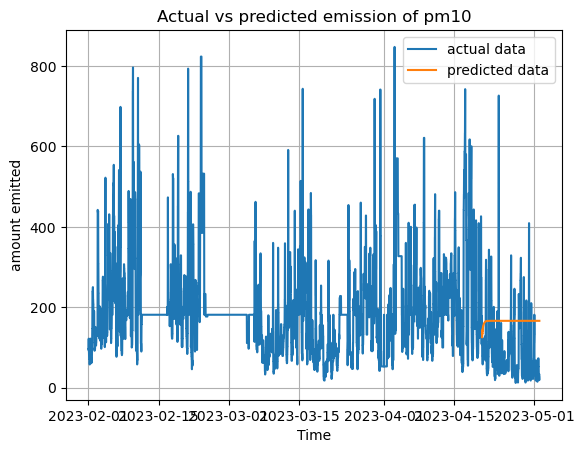

In [47]:
 %matplotlib inline

#matplotlib notebook
plt.plot(pm10_C,label='actual data')
plt.plot(data['pm10 forecast'], label='predicted data')
plt.xlabel('Time')
plt.ylabel('amount emitted')
plt.title('Actual vs predicted emission of pm10')
plt.grid()
plt.legend()
plt.show()



In [48]:
ape = np.abs((data_test['pm10'] - data['pm10 forecast']) / data_test['pm10'])
mape = np.mean(ape) * 100

print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 247.04689859062069


In the given scenario, we have replaced the missing values in the dataset with zero and used an ARIMA model for prediction. However, this approach has led to a mean absolute error (MAE) of infinity in the ARIMA predicted model.

The reason for this is that when we replaced the missing values with zero, it has a significant impact on the calculations of the MAE. The MAE is calculated by taking the absolute difference between the predicted values and the actual values and then averaging them. Since the missing values were replaced with zero, any non-zero actual value would result in an infinite error when divided by zero.

To address this issue, we can consider an alternative approach. Instead of replacing the missing values with zero, we can replace them with the average value of the column. By doing so, we introduce a more realistic estimate for the missing values and avoid the issue of dividing by zero.

With the missing values replaced by the average value, we can re-evaluate the ARIMA model and calculate the MAE. This time, the MAE should provide a more meaningful measure of the prediction accuracy. Although there might still be errors associated with the model, they should be within a reasonable range.

In summary, replacing missing values with zero in the ARIMA model resulted in an infinite MAE due to the division by zero. To address this, we can replace the missing values with the average value of the column, which should provide a more accurate assessment of the model's performance.








